In [2]:
import requests
import time
import re
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
from urllib.parse import quote
from bs4 import BeautifulSoup
pd.options.mode.chained_assignment = None

In [38]:
url = "https://www.ibdb.com/shows/#current"
soup = BeautifulSoup(urlopen(url), 'html.parser')
showlinks = soup.find("div", {"id": "current"}).find_all("a", href=re.compile("/broadway-production/"))
shows = pd.DataFrame()
for showlink in showlinks:
    shows = pd.concat([shows, pd.DataFrame([[showlink.find("i").text, "https://www.ibdb.com/"+quote(showlink['href'])+"#OpeningNightCast"]])], ignore_index=True)
shows.columns = ["show","IBDB page"]
shows


,show,IBDB page
0,& Juliet,https://www.ibdb.com//broadway-production/-jul...
1,"A Beautiful Noise, The Neil Diamond Musical",https://www.ibdb.com//broadway-production/a-be...
2,Aladdin,https://www.ibdb.com//broadway-production/alad...
3,Camelot,https://www.ibdb.com//broadway-production/came...
4,Chicago,https://www.ibdb.com//broadway-production/chic...
5,Fat Ham,https://www.ibdb.com//broadway-production/fat-...
6,Funny Girl,https://www.ibdb.com//broadway-production/funn...
7,"Good Night, Oscar",https://www.ibdb.com//broadway-production/good...
8,Grey House,https://www.ibdb.com//broadway-production/grey...
9,Hadestown,https://www.ibdb.com//broadway-production/hade...


In [23]:
df = pd.read_csv("performer_list.csv")
df[df.actor.duplicated() & pd.isnull(df['wikipedia link'])]

,Unnamed: 0,actor,show,wikipedia link
217,217,Afra Hines,Hadestown,NaN
265,265,James Romney,"Harry Potter and the Cursed Child, Parts One a...",NaN
269,269,Jessie Fisher,"Harry Potter and the Cursed Child, Parts One a...",NaN
428,428,Jeigh Madjus,Moulin Rouge! The Musical,NaN
434,434,Brandt Martinez,Moulin Rouge! The Musical,NaN
435,435,Morgan Marcell,Moulin Rouge! The Musical,NaN
436,436,Khori Michelle Petinaud,Moulin Rouge! The Musical,NaN
452,452,Amber Ardolino,Moulin Rouge! The Musical,NaN
476,476,Darius Wright,"New York, New York",NaN
487,487,Jim Borstelmann,"New York, New York",NaN


In [8]:
finale = pd.read_csv("broadway - final_perf_details.csv")
finale.relatives

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4      Gerard Salonga (brother)\nManiya Barredo (cous...
                             ...                        
738                                                  NaN
739                                                  NaN
740                                                  NaN
741                                                  NaN
742                                                  NaN
Name: relatives, Length: 743, dtype: object

In [13]:
finale['relative type'] = [str(rel).split("(")[-1].split(")")[0] for rel in finale.relatives]
finale['relatives'] = [str(rel).split("(")[0] for rel in finale.relatives]

In [3]:
vizdf = pd.read_csv("broadway - final_perf_details.csv")
vizdf

,actor,opening night,show,wikipedia link,terminal school,school (2),relatives,theater credits,film credits,tv credits,screen credits before opening night,screen credits after opening night
0,Christopher Jackson,1997,The Lion King,NaN,American Musical and Dramatic Academy (AMDA),NaN,NaN,16.0,8.0,15.0,0.0,23.0
1,Anthony Ramos,2015,Hamilton,https://en.wikipedia.org/wiki/Anthony_Ramos,American Musical and Dramatic Academy (AMDA),NaN,NaN,9.0,16.0,12.0,1.0,27.0
2,Caissie Levy,2022,Leopoldstadt,https://en.wikipedia.org/wiki/Caissie_Levy,American Musical and Dramatic Academy (AMDA),NaN,NaN,12.0,2.0,6.0,7.0,0.0
3,Clifton Davis,2014,Aladdin,https://en.wikipedia.org/wiki/Clifton_Davis,Andrews University,NaN,NaN,NaN,12.0,42.0,47.0,7.0
4,Lea Salonga,2023,Here Lies Love,https://en.wikipedia.org/wiki/Lea_Salonga,Ateneo de Manila University,NaN,Gerard Salonga (brother)\nManiya Barredo (cous...,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
738,Winsome Brown,2023,Grey House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,Wonza Johnson,2022,MJ The Musical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,Yurel Echezarreta,2014,Aladdin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,Yvette Gonzalez-Nacer,2019,Hadestown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
scatterdf = vizdf[["actor", "show", "opening night", "screen credits before opening night"]]
scatterdf.dropna(inplace=True)
scatterdf["screen credits before opening night"] = scatterdf["screen credits before opening night"].astype(int)
scatterdf["opening night"] = scatterdf["opening night"].astype(int)
scatterdf


,actor,show,opening night,screen credits before opening night
0,Christopher Jackson,The Lion King,1997,0
1,Anthony Ramos,Hamilton,2015,1
2,Caissie Levy,Leopoldstadt,2022,7
3,Clifton Davis,Aladdin,2014,47
4,Lea Salonga,Here Lies Love,2023,0
...,...,...,...,...
676,Richard Gallagher,"Harry Potter and the Cursed Child, Parts One a...",2018,0
677,Robyn Hurder,Moulin Rouge! The Musical,2019,0
705,Seth Stewart,Hamilton,2015,3
728,Tatiana Maslany,Grey House,2023,65


In [215]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter(scatterdf, 
                 x="screen credits before opening night", 
                 y="show", 
                 size="screen credits before opening night",
                #  marginal_x="histogram", 
                 color_discrete_sequence=["#FFDD83"],
                 template="plotly_white",
                 opacity=1,
                 height=1200,
                 )
# fig.update_layout(showlegend=False) 
fig.update_layout(scattermode="group", scattergap=1)
fig.update_traces(
    customdata=scatterdf["actor"],
    hovertemplate='<b>%{customdata}</b> <br><br>%{y}<br>%{x} screen credits')
fig.update_layout(
    hoverlabel=dict(
        bgcolor="#FFDD83",
        bordercolor="white",
        font_color="black",
        # border_color="white"
    ),
    xaxis={'title':'\nNumber of Screen Credits Before Opening Night', 'fixedrange':True},
    yaxis={'title':'Show\n', 'fixedrange':True},
    margin=dict(l=0, r=0, t=0, b=0),
)
# fig.update_layout(hovermode="x")
# fig.update_xaxes(showspikes=True, spikecolor="#FFDD83", spikesnap="hovered data", spikemode="across", spikethickness=1)

# Ticklabels wrap
# import re,itertools

# ylabels=[]
# for label in scatterdf["show"]:
#     if len(label)>20:
#         label = re.sub(' ', lambda m, c=itertools.count(): m.group() if next(c) % 3 else '<br>', label)

#         # label = label.split(" ")[:20] + '<br>' + label[20:]
#     ylabels.append(label)

# fig.update_yaxes(tickvals=scatterdf["show"], ticktext=ylabels)
                                                      

fig.show(config={'displayModeBar': False})

In [216]:
fig.write_html("../../../../tejalwakchoure.github.io/_includes/broadway-screen-credits.html", 
               config={'displayModeBar': False, 'responsive': True},
               include_plotlyjs=False, full_html=False)


In [93]:
sunburstdf = vizdf[["actor", "terminal school"]]
sunburstdf.dropna(inplace=True)
sunburstdf
# scatterdf["screen credits before opening night"] = scatterdf["screen credits before opening night"].astype(int)
# scatterdf["opening night"] = scatterdf["opening night"].astype(int)
# scatterdf

,actor,terminal school
0,Christopher Jackson,American Musical and Dramatic Academy (AMDA)
1,Anthony Ramos,American Musical and Dramatic Academy (AMDA)
2,Caissie Levy,American Musical and Dramatic Academy (AMDA)
3,Clifton Davis,Andrews University
4,Lea Salonga,Ateneo de Manila University
...,...,...
160,Lauren Zakrin,Western Michigan University
161,Patrick Page,Whitman College
162,Andrew Burnap,Yale University
163,Brian Tyree Henry,Yale University


In [251]:
# pvtschools = pd.pivot_table(sunburstdf, index=['terminal school'],
#                        aggfunc={'actor': np.count_nonzero}).sort_values("actor", ascending=False).reset_index()
pvtschools = sunburstdf['terminal school'].value_counts().rename_axis('terminal school').reset_index()
others = pvtschools[pvtschools['count']<2].sum()[1]
others
otherrow = pd.DataFrame([["other schools", others]], columns=['terminal school', 'count'])
# others
pvtschools = pvtschools[pvtschools['count']>=2]
sunburstcleandf = pd.concat([pvtschools, otherrow]).sort_values("count", ascending=False)
sunburstcleandf['empty'] = " "
sunburstcleandf


,terminal school,count,empty
0,other schools,45,
0,didn't go to college,38,
1,New York University,25,
2,Juilliard School,8,
3,Carnegie Mellon University,7,
4,University of Southern California,5,
5,Northwestern University,4,
9,Marymount Manhattan College,3,
12,Yale University,3,
11,Oklahoma City University,3,


In [308]:
# import plotly.graph_objects as go

# fig =go.Figure(go.Sunburst(
#     labels=sunburstcleandf['terminal school'],
#     parents=sunburstcleandf['empty'],
#     values=sunburstcleandf['count'],
#     root_color="white",
#    marker=dict(
#         colors=sunburstcleandf['count'],
#         colorscale='Greens',
#         color_discrete_map={"other": 'gray'}),
#     name='',
# ))

import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(
    labels=sunburstcleandf['terminal school'], values=sunburstcleandf['count'], hole=.5,
    marker=dict(color='LightSkyBlue'),
    )])
fig.update_traces(textposition='inside', textinfo='label',
    customdata=sunburstcleandf["terminal school"],
    hovertemplate='<b>%{customdata}</b><br>%{value}')

fig.update_layout(
    hoverlabel=dict(
        bgcolor="#FFDD83",
        bordercolor="white",
        font_color="black",
        # border_color="white"
    ),
    margin=dict(l=0, r=0, t=0, b=0),
    width=800,height=800,
    showlegend=False
)

fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.pie.Marker: 'color'

Did you mean "colors"?

    Valid properties:
        colors
            Sets the color of each sector. If not specified, the
            default trace color set is used to pick the sector
            colors.
        colorssrc
            Sets the source reference on Chart Studio Cloud for
            `colors`.
        line
            :class:`plotly.graph_objects.pie.marker.Line` instance
            or dict with compatible properties
        pattern
            Sets the pattern within the marker.
        
Did you mean "colors"?

Bad property path:
color
^^^^^

In [319]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=sunburstcleandf['terminal school'], values=sunburstcleandf['count'], hole=0.8)])

fig.update_layout(
    hoverlabel=dict(
        bgcolor="#FFDD83",
        bordercolor="white",
        font_color="black",
        # border_color="white"
    ),
    margin=dict(l=0, r=0, t=0, b=0),
    # width=800,height=800,
    showlegend=False
)
fig.update_traces(textposition='inside', textinfo='label',
    # customdata=sunburstcleandf["terminal school"],
    hovertemplate='<b>%{label}</b><br>%{value}'
    )

fig.show()

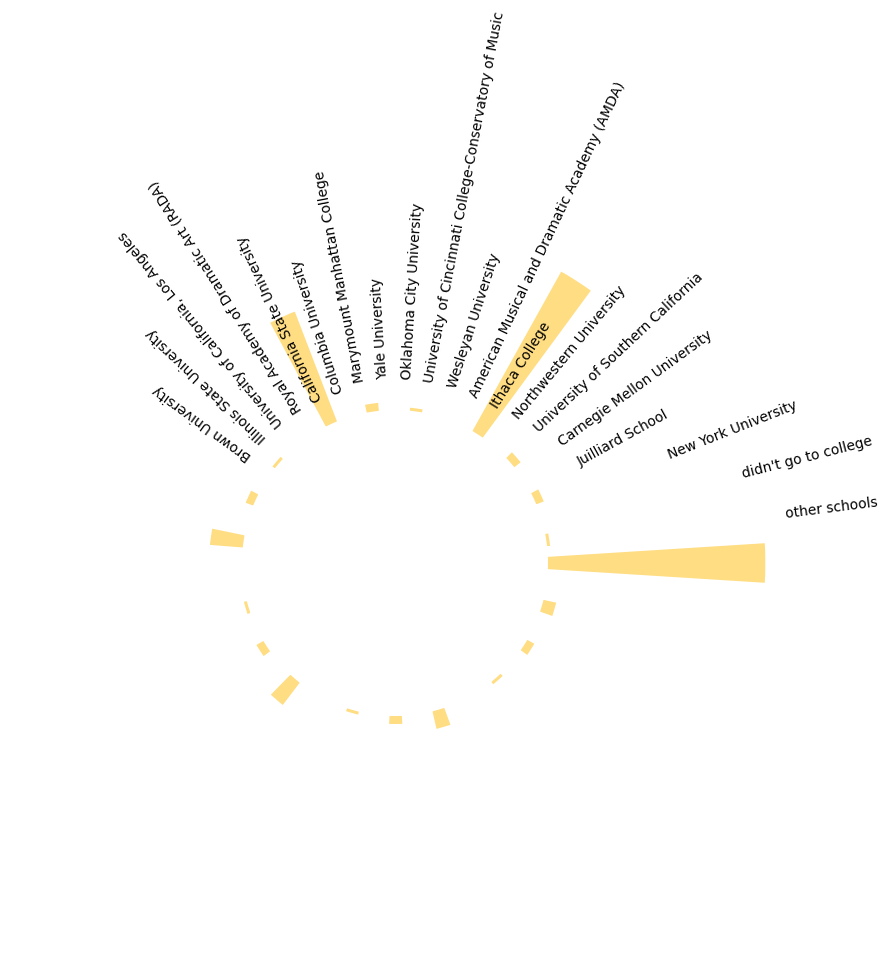

In [290]:
# import pandas for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Reorder the dataframe
df = df.sort_values(by=['Value'])
sunburstcleandf = sunburstcleandf.sort_values('count', ascending=False)

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=sunburstcleandf['terminal school'], 
    height=sunburstcleandf['count'], 
    width=width, 
    bottom=lowerLimit,
    linewidth=5, 
    edgecolor="white",
    color="#FFDD83",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, sunburstcleandf['terminal school']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    # alignment = ""
    # if angle >= np.pi/2 and angle < 3*np.pi/2:
    #     alignment = "right"
    #     rotation = rotation + 180
    # else: 
    #     alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        # ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
